## Loading the Data set:


In [25]:
import pandas as pd
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pickle
import matplotlib.pyplot as plt

<b>Defining the different flairs that will be available.</b>

In [2]:
flairs = ["AskIndia", "Non-Political",
          "Scheduled", "Photography", "Science/Technology",
          "Politics", "Business/Finance", "Policy/Economy",
          "Sports", "Food"]

In [3]:
data = pd.read_csv('f_300_clean.csv')
data.fillna("",inplace = True)

data.replace({'flair': {"AskIndia": 0, "Non-Political": 1,
                      "Scheduled": 2, "Photography": 3,
                     "Science/Technology": 4, "Politics": 5,
                     "Business/Finance": 6, "Policy/Economy": 7,
                     "Sports": 8, "Food": 9 }}, inplace=True)

Y = data.flair
X = data.combined_features

print(X.head())
print(X.shape)

0    differ stage hair loss perfect order mumbai lo...
1    women gather dust storm rajasthan. nan. steve ...
2    zoom took shot night supermoon stack detail lu...
3    wild gaur nagarahol nation park. nan. wild pro...
4    puffi superdog zenfon. nan. nice have tree hou...
Name: combined_features, dtype: object
(2422,)


<b>
Splitting the data into Training and Testing for valuation of accuracy and validation</b>

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print(len(X_train))
print(len(X_test))

1937
485


<b>
    Initializing some essential variables.
    </b>
 

In [5]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

## Corpus Tokenization:
<br>
<b>
Now i Vectorized the training corpus, by turning each text into either a sequence of integers. The vocabulary size has been set to 5000 words.
    </b>

In [6]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
dict(list(word_index.items())[1:10])

{'like': 2,
 'peopl': 3,
 'hai': 4,
 'india': 5,
 'http': 6,
 'time': 7,
 'good': 8,
 'delet': 9,
 'com': 10}

In [7]:
X_train = tokenizer.texts_to_sequences(X_train)
print(X_train[10])

[841, 2559, 5, 1194, 1, 35, 212, 399, 560, 11, 8, 16, 2559, 57, 167, 224, 262, 180, 997, 2, 937, 5, 1, 32, 426, 167, 47, 163, 246, 1161, 2299, 316, 2515, 32, 426, 288, 1, 2299, 449, 248, 153, 44, 167, 246, 1161, 192, 992, 546, 167, 546, 246, 568, 755, 248, 1891, 449, 377, 771, 8, 187, 1243, 356, 31, 248, 1, 546, 73, 449, 248, 2299, 316, 248, 938, 167, 546, 246, 260, 2466, 874, 2380, 2299, 1589, 679, 1161, 336, 609, 3016, 3, 607, 1405, 449, 968, 59, 1161, 1027, 336, 4578, 249, 2787, 442, 607, 1405, 167, 546, 1161, 315, 422, 638, 356, 16, 357, 63, 1177, 937, 1161, 597, 1205, 47, 1921, 80, 44, 1891, 248, 153, 44, 21, 356, 1, 449, 248, 1306, 679, 204, 1384, 696, 250, 2560, 174, 163, 2741, 243, 1, 376, 1421, 878, 11, 103, 153, 858, 153, 2637, 655, 400, 153, 2637, 37, 1741, 449, 114, 1, 29, 202, 37, 188, 254, 532, 1766, 266, 312, 202, 1661, 2957, 44, 234, 4228, 714, 644, 1831, 581, 44, 1, 130, 29, 841, 2186, 1054, 1007, 383, 234, 414, 532, 702, 757, 298, 9, 20, 1, 1, 1663, 2231, 747, 850, 25

In [26]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

<b>
Adding padding of 0 to each entry in the training data to make the maximum size uniform.
</b>

In [8]:
X_train = pad_sequences(X_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(X_train[0])

[3377    1  188    1    1  840 1705 1622  512   35 1205 1766    1  248
 2069  480  126 2784   12  278    1 3645  574  548   12 1064  355   87
  165 3377  480 4092   12 1220  321  188  333 1600 1380    3  105  254
 1706 3960 2267    1   14  201   13   37   73 1828 1268   62  226   76
 1075   64  321 1600   29   88  126  420  331  480  359    1  699    1
  126 1828  126  420 2462 2033    8   18    1    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

<b>Prepareing the Test data also</b>

In [9]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [10]:
print(Y_train.head())
print(Y_test.head())
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)

1606    9
1517    9
1848    5
1260    8
118     3
Name: flair, dtype: int64
613     0
1266    8
892     6
296     4
611     0
Name: flair, dtype: int64


## Defining a function which plots:
<b>
<br>
The Training and Validation Accuracy V/S number of Epoch
<br>
The Training and Validation Loss V/S number of Epoch
</b>

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

## Define a Sequential Model:


In [ ]:
input_dim = X_train.shape[1]  # Number of features

model = tf.keras.Sequential([
    tf.keras.layers.Dense(150,input_dim=input_dim, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()

<b>
Fitting the Model
    </b>

In [ ]:
num_epochs = 15
history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test), verbose=True)

<b>Analysis and Validation</b>

In [ ]:
plot_history(history)
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

<b>Added Embedding and dropout layers to the Model:</b>

In [12]:
input_dim = X_train.shape[1]  # Number of features

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 64)           320000    
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1000)              65000     
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
Total params: 395,010
Trainable params: 395,010
Non-trainable params: 0
_________________________________________________________________


In [13]:
num_epochs = 7
history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test), verbose=True)
model.reset_metrics()
model.save('DL_Model.h5')


Train on 1937 samples, validate on 485 samples
Epoch 1/7
1937/1937 [==============================] - 1s 417us/sample - loss: 2.3018 - accuracy: 0.1048 - val_loss: 2.2911 - val_accuracy: 0.1588
Epoch 2/7
1937/1937 [==============================] - 0s 167us/sample - loss: 2.2441 - accuracy: 0.1673 - val_loss: 2.1312 - val_accuracy: 0.2309
Epoch 3/7
1937/1937 [==============================] - 0s 166us/sample - loss: 1.9182 - accuracy: 0.3893 - val_loss: 1.7460 - val_accuracy: 0.3897
Epoch 4/7
1937/1937 [==============================] - 0s 167us/sample - loss: 1.4552 - accuracy: 0.5281 - val_loss: 1.4017 - val_accuracy: 0.5031
Epoch 5/7
1937/1937 [==============================] - 0s 166us/sample - loss: 1.0560 - accuracy: 0.6665 - val_loss: 1.2363 - val_accuracy: 0.5505
Epoch 6/7
1937/1937 [==============================] - 0s 165us/sample - loss: 0.8035 - accuracy: 0.7455 - val_loss: 1.1498 - val_accuracy: 0.6000
Epoch 7/7
1937/1937 [==============================] - 0s 164us/sample 

In [23]:
mo = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

mo.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


mo.load_weights('DL_Model.h5')

mo.predict([X_test[0]])

print(X_train[0])
print(X_train.shape)

ValueError: Error when checking input: expected embedding_9_input to have shape (200,) but got array with shape (1,)

Training Accuracy: 0.8797
Testing Accuracy:  0.6186


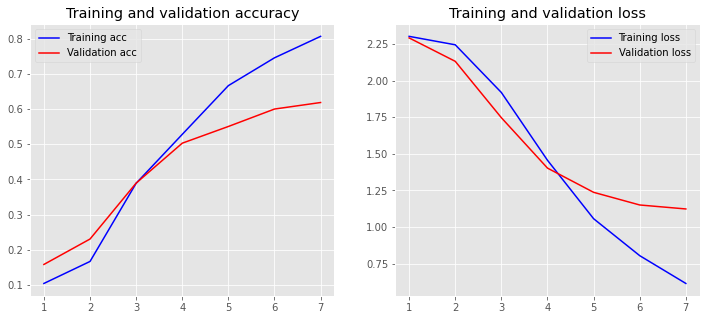

In [15]:
plot_history(history)
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
vocab_size = len(tokenizer.word_index) + 1  

import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix
print(vocab_size)

In [ ]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
        'glove.6B.50d.txt',
        tokenizer.word_index, embedding_dim)


In [ ]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / vocab_size)

In [ ]:
input_dim = X_train.shape[1]  # Number of features

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                              input_length=max_length, trainable=False),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
num_epochs = 20
history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test), verbose=True)

In [ ]:
plot_history(history)
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
input_dim = X_train.shape[1]  # Number of features

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                              input_length=max_length, trainable=True),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
num_epochs = 25
history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test), verbose=True)

In [ ]:
plot_history(history)
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
num_epochs = 15
history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test), verbose=True)

In [ ]:
plot_history(history)
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
input_dim = X_train.shape[1]  # Number of features

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 13, activation='relu'),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
num_epochs = 9
history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test), verbose=True)

In [ ]:
plot_history(history)
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

32 5 is 47
32 3 is 52
32 7 is 46
64 3 is 56
64 5 is 55
64 7 is 49
128 3 is 58
128 5 is 52
128 7 is 50
128 13 is 50